# Deep AutoEncoder To Reduce The Dimensionality Of Image

Using mnist dataset.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, InputLayer, Dense

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
model = Sequential()

# encoder
model.add(InputLayer(shape= (784, )))
model.add(Dense(units= 128, activation= 'relu'))
model.add(Dense(units= 64, activation= 'relu'))

model.add(Dense(units= 32, activation= 'relu'))

# decoder
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dense(units= 128, activation= 'relu'))
model.add(Dense(units= 784, activation= 'sigmoid'))

In [9]:
model.compile(optimizer= tf.keras.optimizers.Adam(), loss= 'binary_crossentropy', metrics= ['accuracy'])

In [10]:
model.fit(
    x_train,
    x_train,
    batch_size= 256,
    epochs= 50,
    validation_data= (x_test, x_test)
)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0081 - loss: 0.3424 - val_accuracy: 0.0120 - val_loss: 0.1660
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0124 - loss: 0.1558 - val_accuracy: 0.0117 - val_loss: 0.1326
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0105 - loss: 0.1302 - val_accuracy: 0.0105 - val_loss: 0.1187
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0113 - loss: 0.1183 - val_accuracy: 0.0090 - val_loss: 0.1123
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0113 - loss: 0.1126 - val_accuracy: 0.0101 - val_loss: 0.1083
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0123 - loss: 0.1087 - val_accuracy: 0.0107 - val_loss: 0.1052
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0128 - loss: 0.1057 - val_accuracy: 0.0108 - val_loss: 0.1021
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0122 - loss: 0.1031 - val_accuracy: 0.

In [12]:
original_dimension = Input(shape= (784, ))
encoder_layer1 = model.layers[0]
encoder_layer2 = model.layers[1]
encoder_layer3 = model.layers[2]

encoder = Model(
    original_dimension,
    encoder_layer3(encoder_layer2(encoder_layer1(original_dimension)))
)

encoder.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
encoded_images = encoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [14]:
decoded_images = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


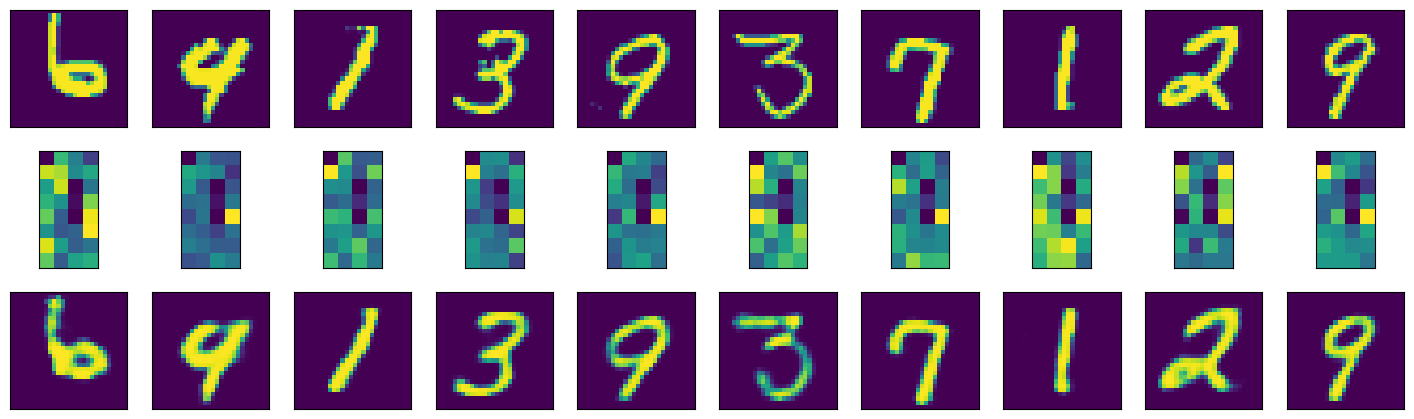

In [15]:
num_images = 10
images_test = np.random.randint(x_test.shape[0], size= num_images)

plt.figure(figsize= (18, 18))
for i, index_image in enumerate(images_test):
    # original image
    axis = plt.subplot(10, 10, i+1)
    plt.imshow(x_test[index_image].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())

    # encoded image
    axis = plt.subplot(10, 10, i+1+num_images)
    plt.imshow(encoded_images[index_image].reshape(8, 4))
    plt.xticks(())
    plt.yticks(())

    # decoded image
    axis = plt.subplot(10, 10, i+1+num_images*2)
    plt.imshow(decoded_images[index_image].reshape(28, 28))
    plt.xticks(())
    plt.yticks(())